In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("kidney_disease.csv")

df.columns = ['id','age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
              'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
for col in cat_cols:
    df[col] = pd.Categorical(df[col]).codes
X = df.drop(columns='classification')

y = df['classification']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 96.3:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
ckd_counts = df['classification'].value_counts()

Model Accuracy: 96.30%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



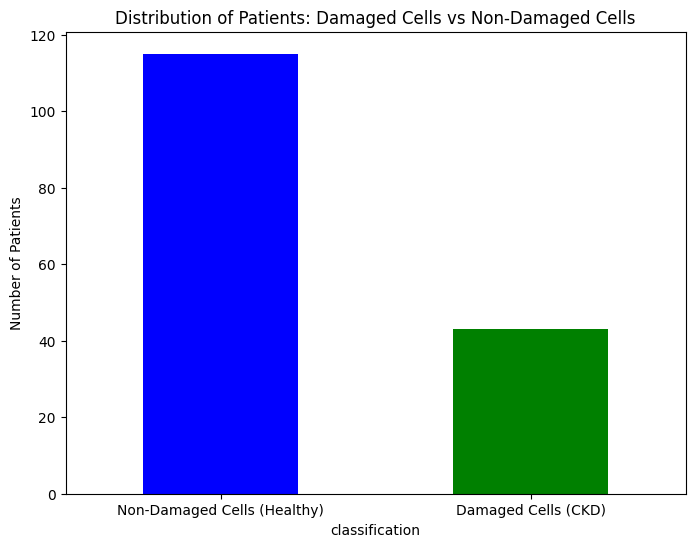

In [ ]:
plt.figure(figsize=(8, 6))
ckd_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Patients: Damaged Cells vs Non-Damaged Cells')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Non-Damaged Cells (Healthy)', 'Damaged Cells (CKD)'], rotation=0)
plt.show()